In [1]:
import pandas as pd
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
df = pd.read_csv(r"./dataset/image_annotations.csv")
df

,Image Path,Caption
0,train_cleaned\Ao\0_0_1638449276_jpg.jpg,purple and green shirt with a white collar and...
1,train_cleaned\Ao\100_0_1638449374_jpg.jpg,purple square with a black sweater and a blue ...
2,train_cleaned\Ao\101_0_1638449375_jpg.jpg,a close up of a blue jacket with a red tie on ...
3,train_cleaned\Ao\102_0_1638449376_jpg.jpg,a close up of a red shirt with a gold medal ar...
4,train_cleaned\Ao\103_0_1638449377_jpg.jpg,a close up of a black and yellow pirate hat wi...
...,...,...
4507,train_cleaned\Xe\96_0_1638450239_jpg.jpg,a close up of a toy car with a computer on top...
4508,train_cleaned\Xe\97_0_1638450240_jpg.jpg,a close up of a scooter on a red background wi...
4509,train_cleaned\Xe\98_0_1638450240_jpg.jpg,yellow car with black stripes on orange backgr...
4510,train_cleaned\Xe\99_0_1638450240_jpg.jpg,a close up of a toy car on a green background


In [3]:
category_dico = {"Ao" : "shirt",
 "Balo" : "backpack",
 "Ca" : "wather animals",
 "CanCau" : "wands",
 "Cho" : "dogs",
 "Ghe" : "chairs",
 "Giay" : "shoes",
 "Giuong" : "beds",
 "Heo" : "pigs",
 "Khac" : "divers",
 "Khoi" : "cubes",
 "Kinh" : "glasses",
 "Leu" : "triangles",
 "Meo" : "cats",
 "Non" : "hats",
 "Quan" : "pants",
 "Tho" : "bunnys",
 "Toc" : "hair cuts",
 "Trung" : "eggs",
 "Vay" : "skirts",
 "Xe" : "cars"}

In [4]:
df["category"] = df["Image Path"].apply(lambda x :category_dico[x.replace("train_cleaned\\","").split("\\")[0]])
df

,Image Path,Caption,category
0,train_cleaned\Ao\0_0_1638449276_jpg.jpg,purple and green shirt with a white collar and...,shirt
1,train_cleaned\Ao\100_0_1638449374_jpg.jpg,purple square with a black sweater and a blue ...,shirt
2,train_cleaned\Ao\101_0_1638449375_jpg.jpg,a close up of a blue jacket with a red tie on ...,shirt
3,train_cleaned\Ao\102_0_1638449376_jpg.jpg,a close up of a red shirt with a gold medal ar...,shirt
4,train_cleaned\Ao\103_0_1638449377_jpg.jpg,a close up of a black and yellow pirate hat wi...,shirt
...,...,...,...
4507,train_cleaned\Xe\96_0_1638450239_jpg.jpg,a close up of a toy car with a computer on top...,cars
4508,train_cleaned\Xe\97_0_1638450240_jpg.jpg,a close up of a scooter on a red background wi...,cars
4509,train_cleaned\Xe\98_0_1638450240_jpg.jpg,yellow car with black stripes on orange backgr...,cars
4510,train_cleaned\Xe\99_0_1638450240_jpg.jpg,a close up of a toy car on a green background,cars


In [5]:
df = df.drop_duplicates("Caption").reset_index(drop=True)
df

,Image Path,Caption,category
0,train_cleaned\Ao\0_0_1638449276_jpg.jpg,purple and green shirt with a white collar and...,shirt
1,train_cleaned\Ao\100_0_1638449374_jpg.jpg,purple square with a black sweater and a blue ...,shirt
2,train_cleaned\Ao\101_0_1638449375_jpg.jpg,a close up of a blue jacket with a red tie on ...,shirt
3,train_cleaned\Ao\102_0_1638449376_jpg.jpg,a close up of a red shirt with a gold medal ar...,shirt
4,train_cleaned\Ao\103_0_1638449377_jpg.jpg,a close up of a black and yellow pirate hat wi...,shirt
...,...,...,...
3552,train_cleaned\Xe\93_0_1638450239_jpg.jpg,a close up of a red truck on a blue background,cars
3553,train_cleaned\Xe\94_0_1638450239_jpg.jpg,a close up of a scooter on an orange background,cars
3554,train_cleaned\Xe\95_0_1638450239_jpg.jpg,there is a picture of a dog riding a surfboard,cars
3555,train_cleaned\Xe\97_0_1638450240_jpg.jpg,a close up of a scooter on a red background wi...,cars


In [6]:
df["Caption"] = df["Caption"].apply(lambda x : re.sub(r'\s* that is on the \w+ background', '', x))
df["Caption"] = df["Caption"].apply(lambda x : re.sub(r'\s* with a \w+ background', '', x))
df["Caption"] = df["Caption"].apply(lambda x : re.sub(r'\s* with \w+ background', '', x))
df["Caption"] = df["Caption"].apply(lambda x : re.sub(r'\s* on a \w+ background', '', x))
df["Caption"] = df["Caption"].apply(lambda x : re.sub(r'\s* on \w+ background', '', x))
df["Caption"] = df["Caption"].apply(lambda x : re.sub(r'\s* with a \w+ and \w+ background', '', x))
df["Caption"] = df["Caption"].apply(lambda x : re.sub(r'\s* with a \w+ and \w+ background', '', x))
df["Caption"] = df["Caption"].apply(lambda x : re.sub(r'\s* and a \w+ background', '', x))
df["Caption"] = df["Caption"].apply(lambda x : re.sub(r'\s* with clouds in the background', '', x))
df["Caption"] = df["Caption"].apply(lambda x : re.sub(r'\s* that is on a square \w+ background', '', x))
df["Caption"] = df["Caption"].apply(lambda x : re.sub(r'\s* on it against a \w+ background', '', x))
df["Caption"] = df["Caption"].apply(lambda x : re.sub(r'\s* with a city in the background', '', x))
df["Caption"] = df["Caption"].apply(lambda x : re.sub(r'\s* with a \w+ screen in the background', '', x))
df["Caption"] = df["Caption"].apply(lambda x : re.sub(r'\s* against a \w+ background', '', x))
df["Caption"] = df["Caption"].apply(lambda x : re.sub(r'\s* on a square \w+ background', '', x))
df["Caption"] = df["Caption"].apply(lambda x : re.sub(r'\s* in front of a \w+ background', '', x))
df["Caption"] = df["Caption"].apply(lambda x : re.sub(r'\s* with a carrot colored background', '', x))
df["Caption"] = df["Caption"].apply(lambda x : re.sub(r'\s* in the air with a blue sky in the background', '', x))


df["Caption"] = df["Caption"].apply(lambda x : re.sub(r'a close up of \s*', '', x))
df["Caption"] = df["Caption"].apply(lambda x : re.sub(r'\w+ background with a \s*', '', x))
df["Caption"] = df["Caption"].apply(lambda x : re.sub(r'\w+ background with \s*', '', x))

df.sort_values("Caption",ascending=False)

,Image Path,Caption,category
503,train_cleaned\Ao\67_0_1638449345_jpg.jpg,"yellow, black, and red shirt with white bow on it",shirt
3474,train_cleaned\Xe\163_0_1638450243_jpg.jpg,yellow toy car with open roof with shadow,cars
3510,train_cleaned\Xe\41_0_1638450233_jpg.jpg,yellow toy car with black roof with black top,cars
1871,train_cleaned\Giuong\100_0_1638449943_jpg.jpg,yellow toddler bed with white mattress and woo...,beds
1878,train_cleaned\Giuong\107_0_1638449943_jpg.jpg,yellow toddler bed with a white sheet on top o...,beds
...,...,...,...
629,train_cleaned\Balo\36_0_1638449599_jpg.jpg,a backpack,backpack
566,train_cleaned\Balo\109_0_1638449607_jpg.jpg,a backpack,backpack
579,train_cleaned\Balo\122_0_1638449608_jpg.jpg,a backpack,backpack
2512,train_cleaned\Kinh\93_0_1638450039_jpg.jpg,a baby with glasses,glasses


In [7]:
df = df.drop_duplicates("Caption").reset_index(drop=True)
df

,Image Path,Caption,category
0,train_cleaned\Ao\0_0_1638449276_jpg.jpg,purple and green shirt with a white collar and...,shirt
1,train_cleaned\Ao\100_0_1638449374_jpg.jpg,purple square with a black sweater and a blue ...,shirt
2,train_cleaned\Ao\101_0_1638449375_jpg.jpg,a blue jacket with a red tie,shirt
3,train_cleaned\Ao\102_0_1638449376_jpg.jpg,a red shirt with a gold medal around it,shirt
4,train_cleaned\Ao\103_0_1638449377_jpg.jpg,a black and yellow pirate hat with a skull on it,shirt
...,...,...,...
3019,train_cleaned\Xe\91_0_1638450239_jpg.jpg,a toy scooter,cars
3020,train_cleaned\Xe\93_0_1638450239_jpg.jpg,a red truck,cars
3021,train_cleaned\Xe\94_0_1638450239_jpg.jpg,a scooter on an orange background,cars
3022,train_cleaned\Xe\95_0_1638450239_jpg.jpg,there is a picture of a dog riding a surfboard,cars


In [8]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F

#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-mpnet-base-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-mpnet-base-v2')

c:\Users\user\Documents\Roblux Recommendation System\metaenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
def get_score_model(sentences):
    # Tokenize sentences
    encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')

    # Compute token embeddings
    with torch.no_grad():
        model_output = model(**encoded_input)

    # Perform pooling
    sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

    # Normalize embeddings
    sentence_embeddings = F.normalize(sentence_embeddings, p=2, dim=1)

    # Calculate cosine similarity
    cosine_similarity = torch.nn.functional.cosine_similarity(sentence_embeddings[0].unsqueeze(0), sentence_embeddings[1].unsqueeze(0))

    return cosine_similarity.item()


In [10]:
prompt = "i want red tshirt "

In [11]:
for i , row in tqdm(df.iterrows()):
    sentences = [prompt, row["Caption"]]
    df.loc[i,"score"] = get_score_model(sentences)

3024it [04:08, 12.18it/s]


In [12]:
category_group_by_dico = {cat : i_df for cat, i_df in df.groupby("category")}
best_row_df_list = [category_group_by_dico[category].sort_values("score",ascending=False).head(1) for category in category_group_by_dico]
df_final = pd.concat(best_row_df_list).sort_values("score",ascending=False)
df_final

,Image Path,Caption,category,score
212,train_cleaned\Ao\340_0_1638449515_jpg.jpg,a red and white shirt,shirt,0.576366
2492,train_cleaned\Quan\102_0_1638450191_jpg.jpg,a red and yellow knitted hat and a red and yel...,pants,0.529709
2871,train_cleaned\Vay\20_0_1638450224_jpg.jpg,pink and white hat with white stripes,skirts,0.515602
2294,train_cleaned\Non\107_0_1638450141_jpg.jpg,yellow and red fireman hat,hats,0.500817
2051,train_cleaned\Kinh\19_0_1638450028_jpg.jpg,a red mask,glasses,0.457776
1533,train_cleaned\Giay\554_0_1638449934_jpg.jpg,pair of white socks with red heart on them,shoes,0.454740
775,train_cleaned\CanCau\121_0_1638449675_jpg.jpg,yellow duck and red sticker with a red line,wands,0.445270
1113,train_cleaned\Ghe\284_0_1638449746_jpg.jpg,a red and white striped blanket,chairs,0.427926
552,train_cleaned\Balo\32_0_1638449598_jpg.jpg,a hat,backpack,0.423507
2677,train_cleaned\Tho\152_0_1638450214_jpg.jpg,a purple hat with a star on it,bunnys,0.375595


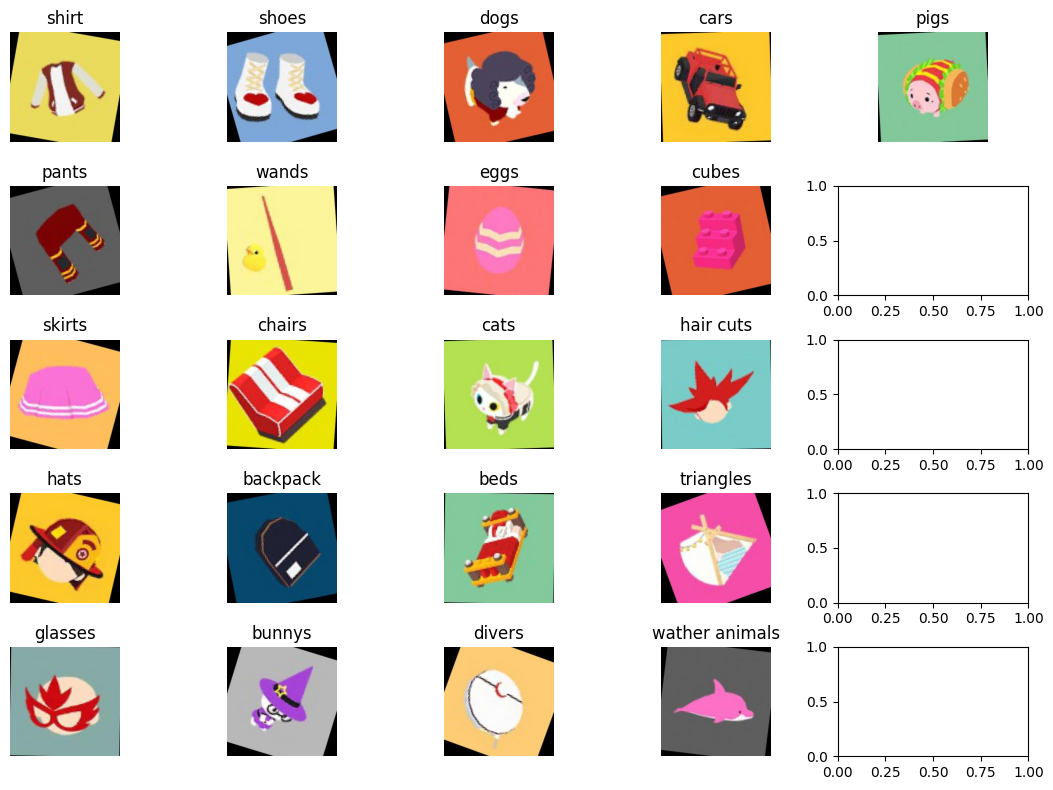

In [13]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

all_best_image_list = []

for i, row in df_final.iterrows():
    image_path = row["Image Path"]
    try:
        image = mpimg.imread(image_path)
        all_best_image_list.append([image, row["category"]])
    except FileNotFoundError:
        print(f"File not found: {image_path}")

size = 5
fig, axs = plt.subplots(size, size, figsize=(11, 8))

i_row = 0
i_col = 0

for image, category in all_best_image_list:
    axs[i_row, i_col].imshow(image)
    axs[i_row, i_col].set_title(category)
    axs[i_row, i_col].axis('off')

    i_row += 1

    if i_row > size-1:
        i_row = 0
        i_col += 1

plt.tight_layout()
plt.show()


c:\Users\user\Documents\Roblux Recommendation System\metaenv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\user\Documents\Roblux Recommendation System\metaenv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Nombre d'images trouvées : 4512


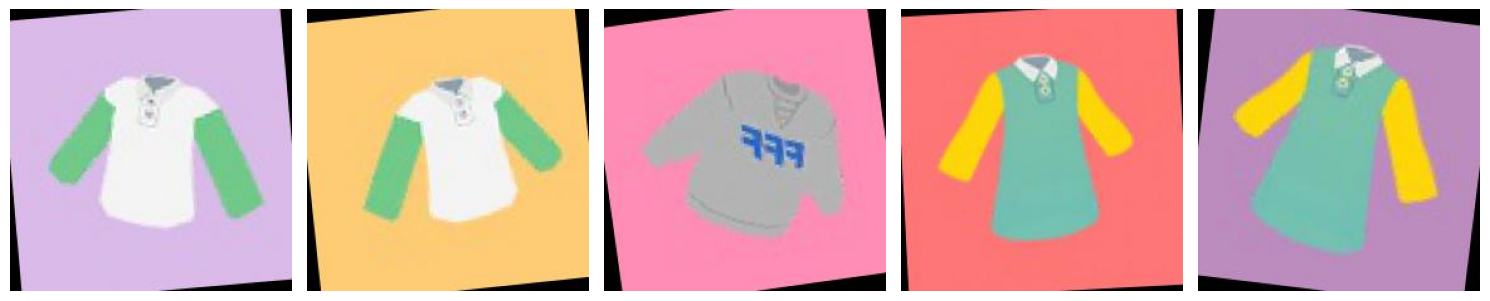

In [14]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

# Utilisation de ResNet50 pour l'extraction de caractéristiques
model = models.resnet50(pretrained=True)
model = torch.nn.Sequential(*list(model.children())[:-1])  # Supprimer la dernière couche
model.eval()

# Transformation pour les images
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

def extract_features(image_path):
    """
    Extrait les caractéristiques d'une image en utilisant le modèle ResNet50.
    """
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0)
    with torch.no_grad():
        features = model(image)
    return features.numpy().flatten()

def get_image_paths(directory, extensions=('jpg', 'png')):
    """
    Récupère récursivement tous les chemins des fichiers d'images dans un répertoire donné.
    """
    image_paths = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(extensions):
                image_paths.append(os.path.join(root, file))
    return image_paths

# Chemin vers le dossier contenant les images
image_dir = './train_cleaned'  # Remplacer par le chemin de votre dossier d'images
image_paths = get_image_paths(image_dir)

# Vérification des chemins des fichiers
if not image_paths:
    raise FileNotFoundError(f"Aucune image trouvée dans le répertoire {image_dir}")
print(f"Nombre d'images trouvées : {len(image_paths)}")

# Extraction des caractéristiques pour toutes les images
features = []
for img in image_paths:
    try:
        feat = extract_features(img)
        features.append(feat)
    except Exception as e:
        print(f"Erreur lors de l'extraction des caractéristiques pour l'image {img}: {e}")

# Convertir en tableau numpy
if not features:
    raise ValueError("Aucune caractéristique extraite des images.")
features = np.array(features)

# Chemin vers l'image de référence
reference_image_path = './train_cleaned/Ao/0_0_1638449276_jpg.jpg'  # Remplacer par le chemin de votre image de référence
reference_features = extract_features(reference_image_path)

# Calcul des similarités (distance cosinus)
similarities = np.dot(features, reference_features) / (np.linalg.norm(features, axis=1) * np.linalg.norm(reference_features))

# Tri des images par similarité
similar_image_indices = np.argsort(similarities)[::-1]

# Affichage des images les plus similaires
num_images_to_show = 5
fig, axes = plt.subplots(1, num_images_to_show, figsize=(15, 5))
for i in range(num_images_to_show):
    img_path = image_paths[similar_image_indices[i]]
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')
plt.tight_layout()
plt.show()
